# MNIST Classification using CNN
https://keras.io/examples/vision/image_classification_from_scratch/

# Headers

In [27]:
import numpy as np
import keras
from keras import layers
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D # convolution layers
from keras.layers import Dense, Dropout, Flatten # core layers

# Load Data

In [28]:
# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

#check image shape
print(x_train[0].shape)

(28, 28)


In [29]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

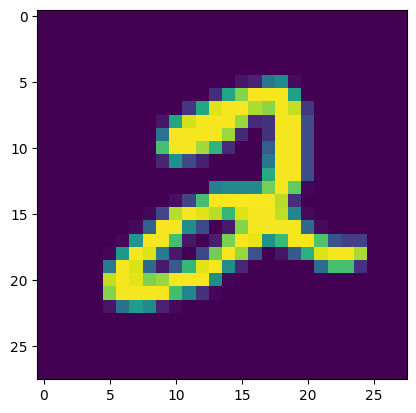

In [30]:
#plot the first image in the dataset
plt.imshow(x_train[5])

In [31]:
print(x_train[1].shape)
print(x_train.shape)
print(x_train.shape[0])

(28, 28)
(60000, 28, 28)
60000


In [32]:
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")

# convert class vectors to binary class matrices
#print(y_train[0])
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
#print(y_train[0])

x_train shape: (60000, 28, 28, 1)
y_train shape: (60000,)
60000 train samples
10000 test samples


# Visualizing the input data

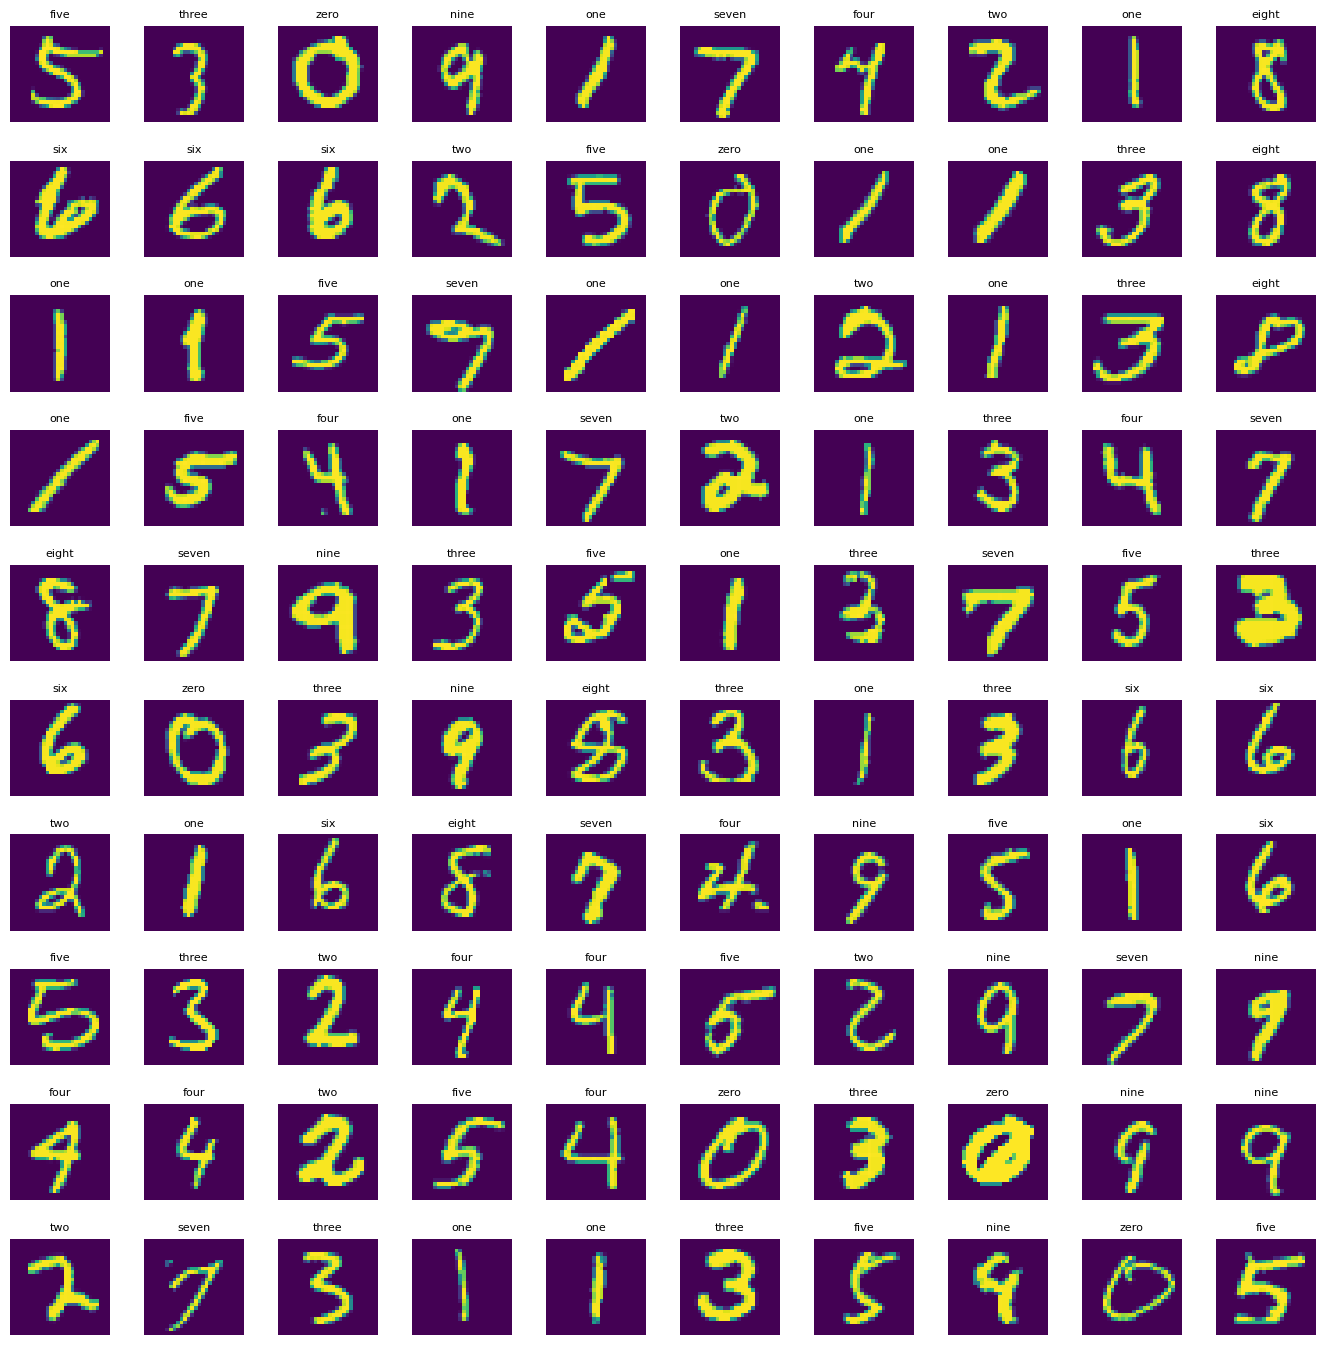

In [33]:
# Define the labels of the dataset
labels = ['one', 'two', 'three', 'four', 'five',
          'six', 'seven', 'eight', 'nine', 'zero']

# Define the dimensions of the plot grid
W_grid = 10
L_grid = 10

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 17 x 17 matrix in an array

n_train = len(x_train) # get the length of the train dataset

# Select a random number from 0 to n_train
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables

    # Select a random number
    index = np.random.randint(0, n_train)
    # read and display an image with the selected index
    axes[i].imshow(x_train[index,1:])
    #label_index = int(y_train[index])
    label_index = np.argmax(y_train[index])
    axes[i].set_title(labels[label_index-1], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

# Model Architecture

In [41]:
model = keras.Sequential()

"""
Iteration 1:
model.add(Conv2D(filters=32, kernel_size = (3,3), activation="relu", input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(num_classes,activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.summary()

batch_size = 128
epochs = 15
"""

"""
Iteration 2:
model.add(Conv2D(filters=64, kernel_size = (3,3), activation="relu", input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(num_classes,activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.summary()

batch_size = 64
epochs = 30
"""

Iteration 3:
model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu", input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=128, kernel_size = (3,3), activation="relu"))
#model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(num_classes,activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.summary()

batch_size = 128
epochs = 5

print("batch_size: ", batch_size)
print("epochs    : ", epochs)


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 5, 5, 128)         0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 3200)              0         
                                                                 
 dense_4 (Dense)             (None, 10)               

# Training the model

In [42]:
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/30
844/844 [==============================] - 6s 5ms/step - loss: 0.1696 - accuracy: 0.9503 - val_loss: 0.0566 - val_accuracy: 0.9848
Epoch 2/30
844/844 [==============================] - 4s 5ms/step - loss: 0.0529 - accuracy: 0.9835 - val_loss: 0.0453 - val_accuracy: 0.9868
Epoch 3/30
844/844 [==============================] - 4s 5ms/step - loss: 0.0364 - accuracy: 0.9894 - val_loss: 0.0405 - val_accuracy: 0.9887
Epoch 4/30
844/844 [==============================] - 4s 5ms/step - loss: 0.0287 - accuracy: 0.9910 - val_loss: 0.0322 - val_accuracy: 0.9913
Epoch 5/30
844/844 [==============================] - 4s 4ms/step - loss: 0.0213 - accuracy: 0.9936 - val_loss: 0.0384 - val_accuracy: 0.9898
Epoch 6/30
844/844 [==============================] - 4s 4ms/step - loss: 0.0167 - accuracy: 0.9948 - val_loss: 0.0390 - val_accuracy: 0.9902
Epoch 7/30
844/844 [==============================] - 4s 5ms/step - loss: 0.0140 - accuracy: 0.9954 - val_loss: 0.0430 - val_accuracy: 0.9902
Epoch 

# Evaluate the model

Test loss: 0.05813358724117279
Test accuracy: 0.9902999997138977
313/313 [==============================] - 1s 2ms/step
(10000,)
(10000,)
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      1.00      1135
           2       0.99      1.00      0.99      1032
           3       0.99      1.00      0.99      1010
           4       1.00      0.98      0.99       982
           5       0.99      0.99      0.99       892
           6       1.00      0.98      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.97      0.99      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



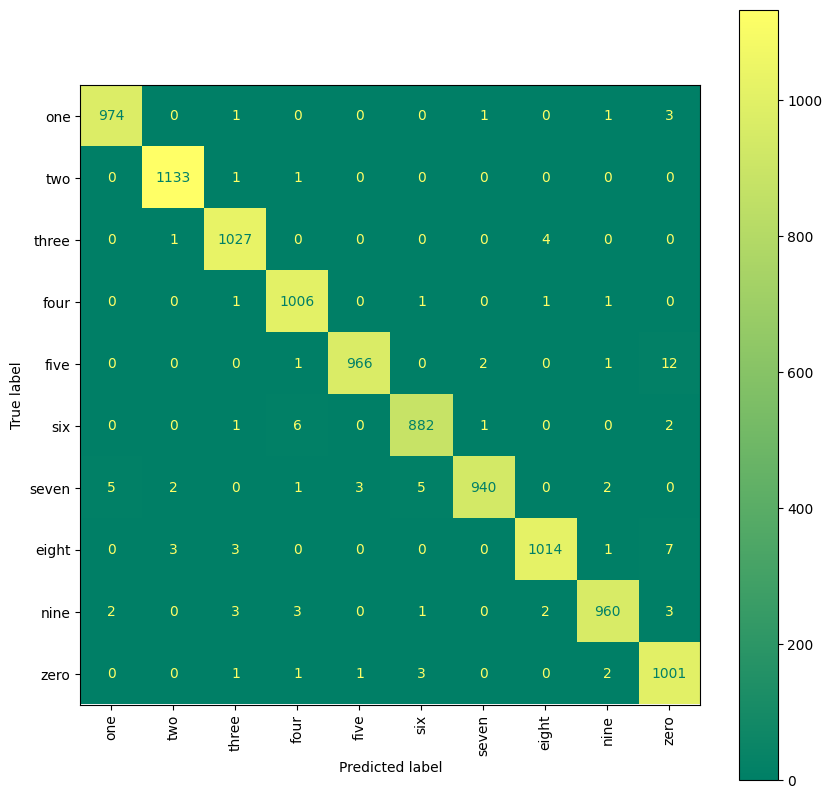

In [44]:
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay

# Test loss and Test Accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

# Precision, Recall and F1 Score
y_pred = model.predict(x_test)

# Extracting highest probability predictions
y_test_max = np.argmax(y_test, axis=1)
y_pred = np.argmax(y_pred, axis=1)

print(y_test_max.shape)
print(y_pred.shape)

print(classification_report(y_test_max, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test_max, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=labels)

# NOTE: Fill all variables here with default values of the plot_confusion_matrix
fig, ax = plt.subplots(figsize=(10, 10))
disp = disp.plot(xticks_rotation='vertical', ax=ax,cmap='summer')

plt.show()

# Plot Training History

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


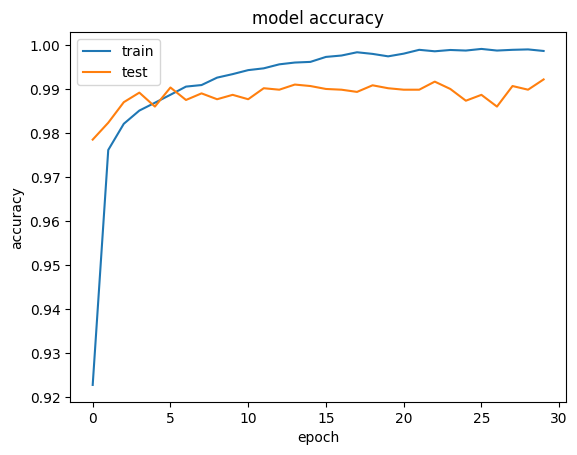

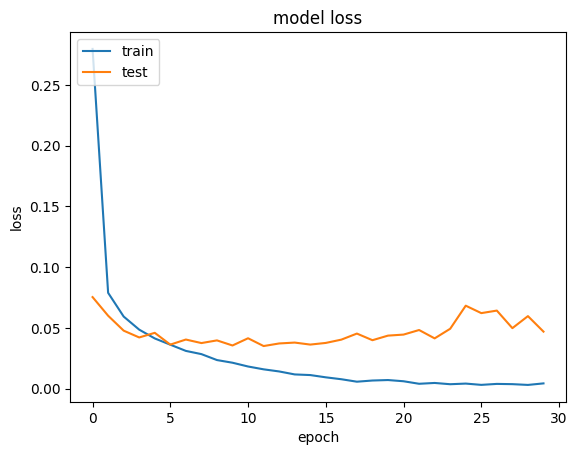

In [ ]:
# list all data in history
print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Visualizing the test data and corresponding predictions

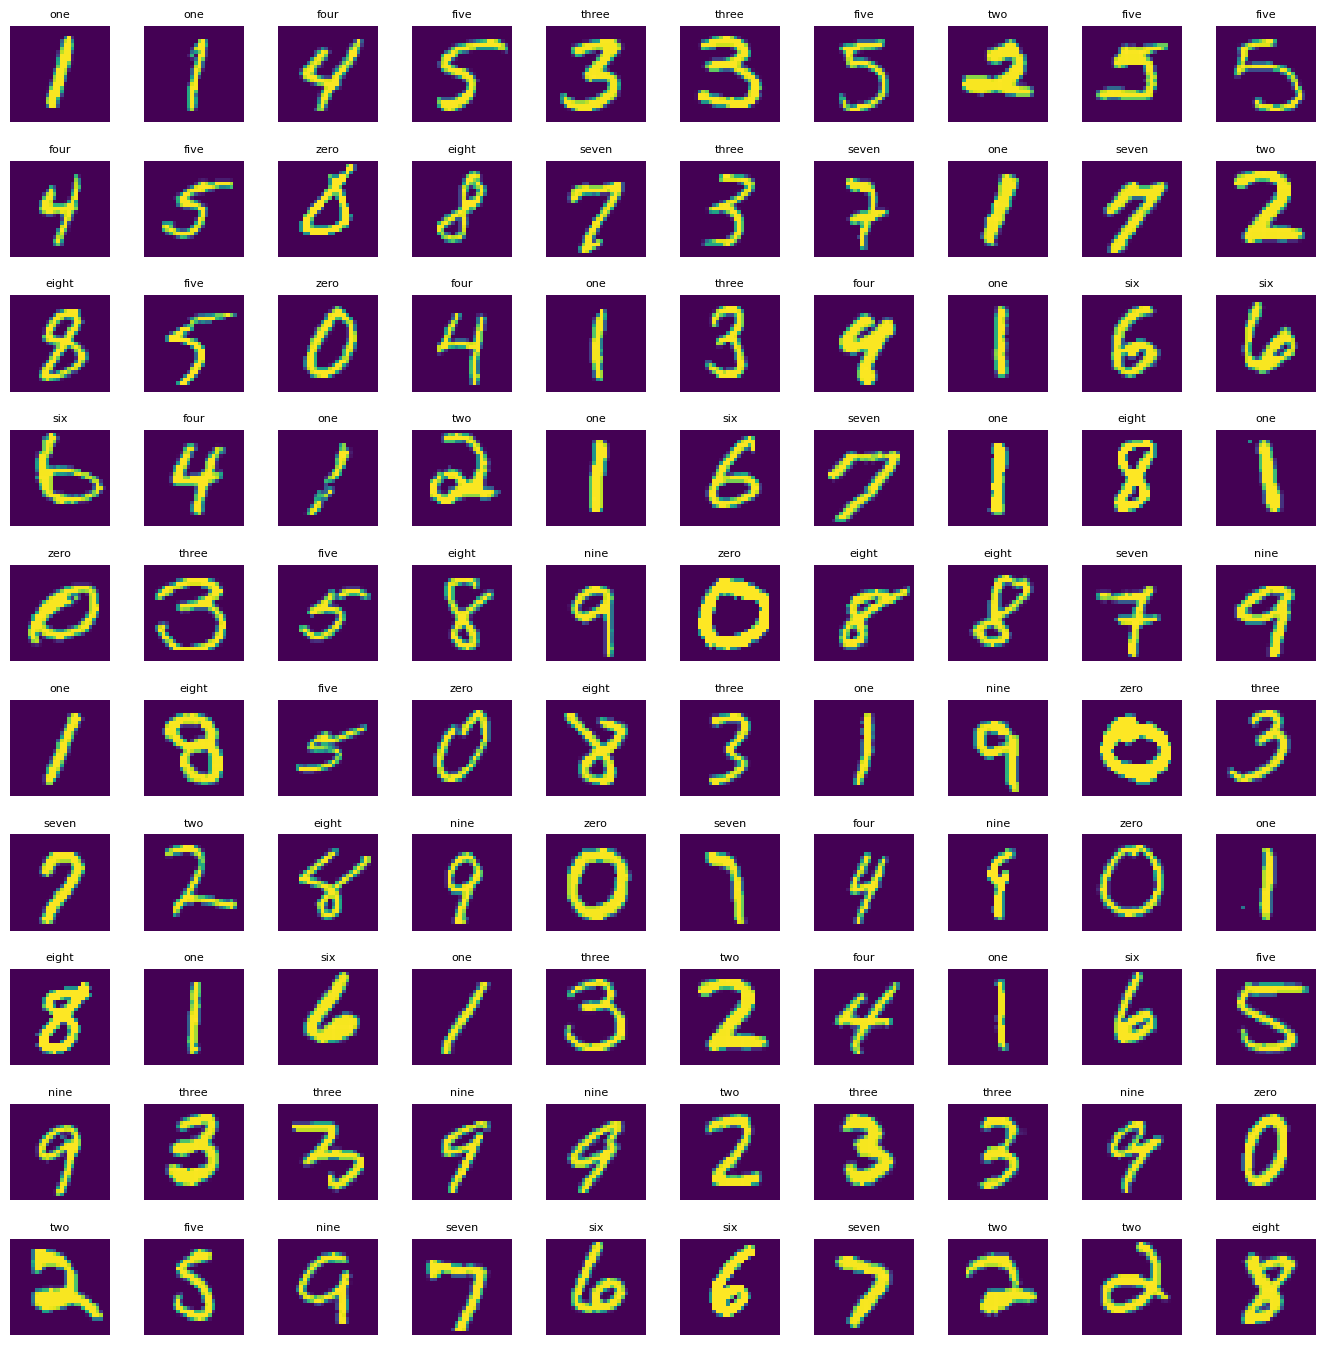

In [ ]:
# Define the labels of the dataset
labels = ['one', 'two', 'three', 'four', 'five',
          'six', 'seven', 'eight', 'nine', 'zero']

# Define the dimensions of the plot grid
W_grid = 10
L_grid = 10

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 17 x 17 matrix in an array

n_test = len(x_test) # get the length of the train dataset

# Select a random number from 0 to n_test
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables

    # Select a random number
    index = np.random.randint(0, n_test)
    # read and display an image with the selected index
    axes[i].imshow(x_test[index,1:])
    #label_index = int(y_test[index])
    label_index = np.argmax(y_test[index])
    axes[i].set_title(labels[label_index-1], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)